In [5]:
import pandas as pd
# url = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv' 

raw = pd.read_csv('./data/vehicles.csv')#, dtype_backend='pyarrow', engine='pyarrow')

/var/folders/l4/jflj14k17pg47nd_5mz4rfx00000gn/T/ipykernel_27314/4197024758.py:4: DtypeWarning: Columns (69,71,72,73,74,75,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('./data/vehicles.csv')#, dtype_backend='pyarrow', engine='pyarrow')


In [6]:
cols = ['year', 'make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr',
    'barrels08', 'city08', 'comb08', 'range', 'evMotor', 'cylinders', 'displ', 'fuelCost08', 
        'fuelType', 'highway08',  'trans_dscr','createdOn']

def to_tz(df_, time_col, tz_offset, tz_name):
    return (df_
            .groupby(tz_offset)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
                       .dt.tz_localize(s.name, ambiguous=True)
                       .dt.tz_convert(tz_name))
            )

autos = (raw.loc[:, cols]
         .assign(
            offset=(raw.createdOn.str.extract(r'\d\d:\d\d (?P<offset>[A-Z]{3}?)')
                .replace('EDT', 'EST5EDT')),
            str_date=(raw.createdOn.str.slice(4,19) + ' ' +
                raw.createdOn.str.slice(-4)),
            createdOn=lambda df_: to_tz(df_, 'str_date', 'offset', 'America/New_York')
         )
)
autos.dtypes

year                                     int64
make                                    object
model                                   object
trany                                   object
drive                                   object
VClass                                  object
eng_dscr                                object
barrels08                              float64
city08                                   int64
comb08                                   int64
range                                    int64
evMotor                                 object
cylinders                              float64
displ                                  float64
fuelCost08                               int64
fuelType                                object
highway08                                int64
trans_dscr                              object
createdOn     datetime64[ns, America/New_York]
offset                                  object
str_date                                object
dtype: object

In [7]:
autos[autos['cylinders'].isna()]

,year,make,model,trany,drive,VClass,eng_dscr,barrels08,city08,comb08,...,evMotor,cylinders,displ,fuelCost08,fuelType,highway08,trans_dscr,createdOn,offset,str_date
7138,2000,Nissan,Altra EV,NaN,NaN,Midsize Station Wagons,NaN,0.0960,81,85,...,62 KW AC Induction,NaN,NaN,900,Electricity,91,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.1128,81,72,...,50 KW DC,NaN,NaN,1050,Electricity,64,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8144,2001,Ford,Th!nk,NaN,NaN,Two Seaters,NaN,0.1248,74,65,...,27 KW AC Induction,NaN,NaN,1150,Electricity,58,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,NaN,0.2088,45,39,...,67 KW AC Induction,NaN,NaN,1950,Electricity,33,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44027,2026,Tesla,Cybertruck AWD,Automatic (A1),All-Wheel Drive,Standard Pickup Trucks 4WD,NaN,0.1032,85,79,...,223 and 226 kW ACPM 3-Phase,NaN,NaN,950,Electricity,72,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44029,2026,Tesla,Model Y Standard RWD (18in Wheels),Automatic (A1),Rear-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0576,148,138,...,228 and 243 kW ACPM 3-Phase,NaN,NaN,550,Electricity,129,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44030,2026,Tesla,Model Y Standard RWD (19in Wheels),Automatic (A1),Rear-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0624,142,131,...,228 and 243 kW ACPM 3-Phase,NaN,NaN,600,Electricity,120,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025
44031,2026,Toyota,bZ (energy capacity 191 Ah),Automatic (A1),Front-Wheel Drive,Small Sport Utility Vehicle 2WD,NaN,0.0624,143,131,...,167 kW AC Synchronous,NaN,NaN,550,Electricity,119,NaN,2025-10-28 00:00:00-04:00,EST5EDT,Oct 28 00:00:00 2025


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output = 'pandas')  # Just transform out pandas 

pipe = Pipeline([('impute', SimpleImputer(strategy = 'median'))])

pipe.fit_transform(autos[['cylinders']])

,cylinders
0,4.0
1,12.0
2,4.0
3,8.0
4,4.0
...,...
49575,4.0
49576,4.0
49577,4.0
49578,4.0


In [9]:
pipe.fit_transform(autos[['cylinders']]).isna().sum()

cylinders    0
dtype: int64

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
displ_imputer = SimpleImputer(strategy = 'median')
cylinder_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

preprocessor = ColumnTransformer(
    transformers = [
        ('cyl_imputer' , cylinder_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ'])
    ],
    remainder = 'passthrough'

)

pipeline = Pipeline(steps = [('preprocessor', preprocessor)])
pipeline.fit_transform(autos)

,cyl_imputer__cylinders,displ_imputer__displ,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,...,remainder__comb08,remainder__range,remainder__evMotor,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,4.0,2.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,...,21,0,NaN,2100,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,12.0,4.9,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,...,11,0,NaN,4000,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,2.2,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,...,27,0,NaN,1650,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,8.0,5.2,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,...,11,0,NaN,4000,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,4.0,2.2,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,...,19,0,NaN,3050,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,4.0,2.2,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,...,22,0,NaN,2000,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49576,4.0,2.2,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,...,23,0,NaN,1900,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49577,4.0,2.2,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2100,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49578,4.0,2.2,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,...,21,0,NaN,2100,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


## Binning

<Axes: >

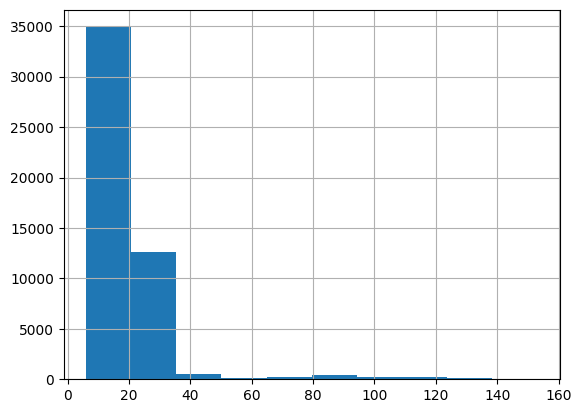

In [12]:
autos.city08.hist()

Binnig is sort of categorizing values into buckets - 

((array([-4.18947091, -3.98363317, -3.87140876, ...,  3.87140876,
          3.98363317,  4.18947091]),
  array([  6,   6,   6, ..., 151, 153, 153])),
 (9.66379602560295, 20.593565954013712, 0.6709985017581473))

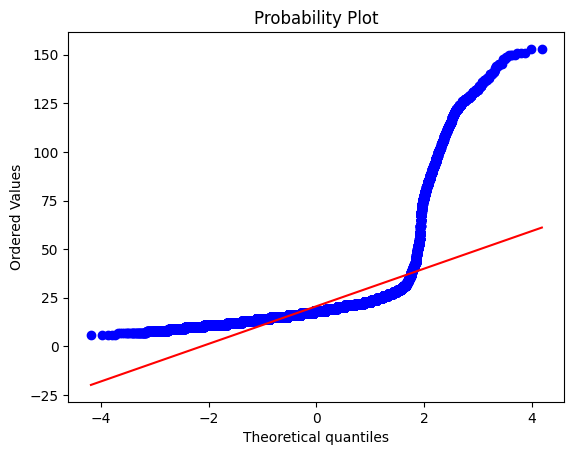

In [13]:
from scipy import stats
from matplotlib import pyplot as plt 

stats.probplot(autos.city08, plot = plt)

In [14]:
autos['city08']

0        19
1         9
2        23
3        10
4        17
         ..
49575    19
49576    20
49577    18
49578    18
49579    16
Name: city08, Length: 49580, dtype: int64

In [15]:
binpd = pd.cut(autos.city08, bins = 10)

In [16]:
binpd.value_counts()

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(79.5, 94.2]        397
(94.2, 108.9]       256
(64.8, 79.5]        243
(108.9, 123.6]      218
(50.1, 64.8]        167
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

In [17]:
binpd.value_counts().sort_values(ascending = False)

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(79.5, 94.2]        397
(94.2, 108.9]       256
(64.8, 79.5]        243
(108.9, 123.6]      218
(50.1, 64.8]        167
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

In [18]:
binpd.value_counts().sort_index()

city08
(5.853, 20.7]     34894
(20.7, 35.4]      12656
(35.4, 50.1]        553
(50.1, 64.8]        167
(64.8, 79.5]        243
(79.5, 94.2]        397
(94.2, 108.9]       256
(108.9, 123.6]      218
(123.6, 138.3]      164
(138.3, 153.0]       32
Name: count, dtype: int64

<Axes: xlabel='city08'>

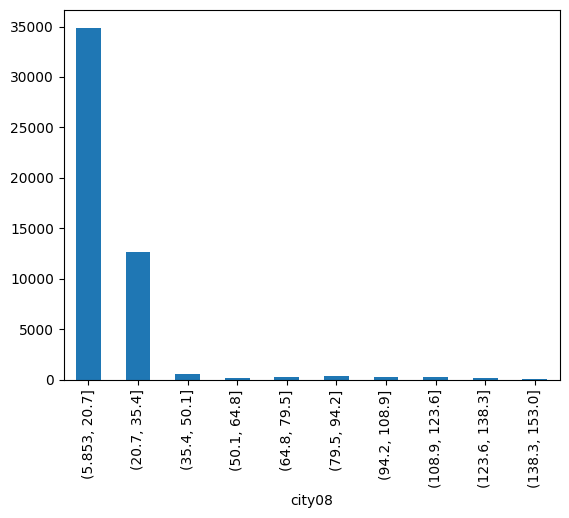

In [19]:
binpd.value_counts().sort_index().plot.bar()

<Axes: xlabel='city08'>

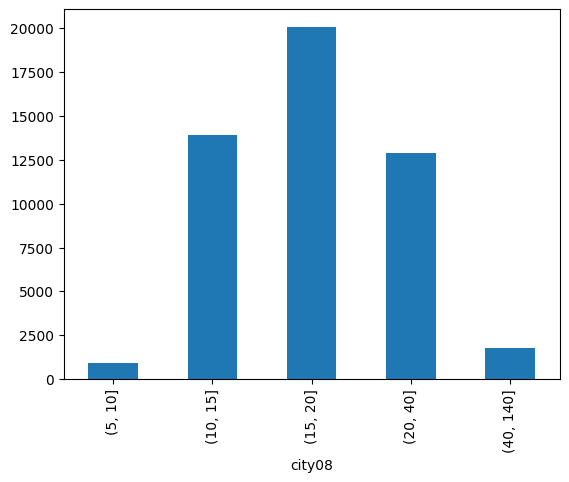

In [20]:
#Manual bins 
(pd.cut(autos.city08, bins=[5,10,15,20,40, 140])
 .value_counts()
 .sort_index()
 .plot.bar()
)

In [21]:
# binning with sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Define the binning strategy
binning_strategy = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

column_transformer = ColumnTransformer(
    transformers=[
        ('binning', binning_strategy, ['city08'])
    ],
    remainder='passthrough'  # This ensures other columns are left unchanged
)


pipeline = Pipeline(steps=[('transformer', column_transformer)])
pipeline.fit_transform(autos)


,binning__city08,remainder__year,remainder__make,remainder__model,remainder__trany,remainder__drive,remainder__VClass,remainder__eng_dscr,remainder__barrels08,remainder__comb08,...,remainder__evMotor,remainder__cylinders,remainder__displ,remainder__fuelCost08,remainder__fuelType,remainder__highway08,remainder__trans_dscr,remainder__createdOn,remainder__offset,remainder__str_date
0,3.0,1985,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(FFS),14.167143,21,...,NaN,4.0,2.0,2100,Regular,25,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
1,0.0,1985,Ferrari,Testarossa,Manual 5-spd,Rear-Wheel Drive,Two Seaters,(GUZZLER),27.046364,11,...,NaN,12.0,4.9,4000,Regular,14,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
2,4.0,1985,Dodge,Charger,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,(FFS),11.018889,27,...,NaN,4.0,2.2,1650,Regular,33,SIL,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
3,0.0,1985,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Rear-Wheel Drive,Vans,NaN,27.046364,11,...,NaN,8.0,5.2,4000,Regular,12,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
4,2.0,1993,Subaru,Legacy AWD Turbo,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,"(FFS,TRBO)",15.658421,19,...,NaN,4.0,2.2,3050,Premium,23,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,3.0,1993,Subaru,Legacy,Automatic 4-spd,Front-Wheel Drive,Compact Cars,(FFS),13.523182,22,...,NaN,4.0,2.2,2000,Regular,26,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49576,3.0,1993,Subaru,Legacy,Manual 5-spd,Front-Wheel Drive,Compact Cars,(FFS),12.935217,23,...,NaN,4.0,2.2,1900,Regular,28,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49577,2.0,1993,Subaru,Legacy AWD,Automatic 4-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2100,Regular,24,CLKUP,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013
49578,2.0,1993,Subaru,Legacy AWD,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,(FFS),14.167143,21,...,NaN,4.0,2.2,2100,Regular,24,NaN,2013-01-01 00:00:00-05:00,EST,Jan 01 00:00:00 2013


# Day 3

## Log Transform

In [22]:
import numpy as np

<Axes: xlabel='city08_log', ylabel='city08'>

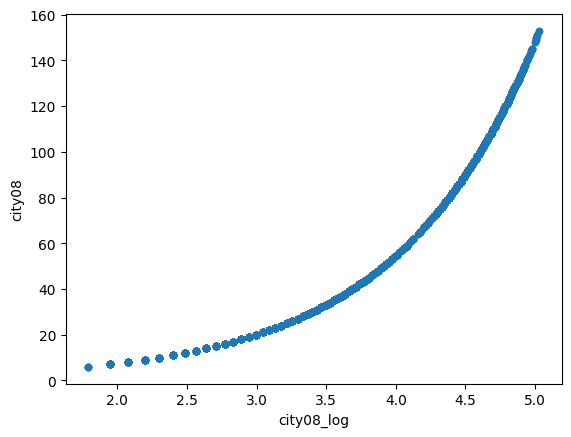

In [24]:
(autos
    .assign(city08_log=np.log(autos.city08))
    .plot.scatter(x='city08_log', y='city08')
    )

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08']).select_dtypes('number')
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('std_scaler', std_scaler),
                           #('minmax_scaler', minmax_scaler), 
                           ('lr', LinearRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [26]:
pipeline.score(X_test, y_test)

0.771741805039419

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pipeline.predict(X_test))

3.8020114636454942

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08']).select_dtypes('number')
y = np.log(autos.city08)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('std_scaler', std_scaler),
                           #('minmax_scaler', minmax_scaler), 
                           ('lr', LinearRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [29]:
pipeline.score(X_test, y_test)

0.905888180753261

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pipeline.predict(X_test))

0.07418768199766942

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pipeline.predict(X_test))

0.013239452479080129

## Scaling

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08']).select_dtypes('number')
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('std_scaler', std_scaler),
                           ('minmax_scaler', minmax_scaler), 
                           ('lr', LinearRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ'])])),
                ('std_scaler', StandardScaler()),
                ('minmax_scaler', MinMaxScaler()), ('lr', LinearRegression())])

### Challenge

In [34]:
autos.head()[['city08', 'barrels08']]

,city08,barrels08
0,19,14.167143
1,9,27.046364
2,23,11.018889
3,10,27.046364
4,17,15.658421


<Axes: xlabel='barrels08', ylabel='city08'>

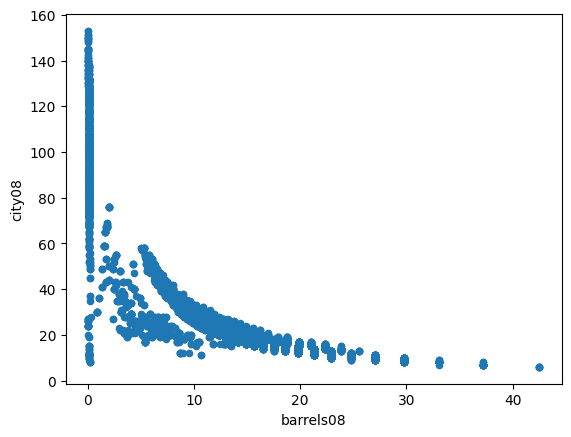

In [51]:
(autos
    # .assign(city08_log=np.log(autos.city08))
    .plot.scatter(x='barrels08', y='city08')
    )

In [39]:
autos.describe()

,year,barrels08,city08,comb08,range,cylinders,displ,fuelCost08,highway08
count,49580.000000,49580.000000,49580.000000,49580.000000,49580.000000,48209.000000,48211.000000,49580.000000,49580.000000
mean,2005.178035,14.939166,20.593566,22.673235,11.297519,5.693273,3.264747,2485.054457,26.328862
std,12.973479,4.738684,14.401056,13.344365,61.987957,1.773855,1.350116,783.359211,12.275861
min,1984.000000,0.047081,6.000000,7.000000,0.000000,2.000000,0.000000,0.000000,9.000000
25%,1993.000000,12.396250,15.000000,17.000000,0.000000,4.000000,2.100000,2000.000000,20.000000
50%,2006.000000,14.875500,18.000000,20.000000,0.000000,6.000000,3.000000,2450.000000,24.000000
75%,2017.000000,17.500588,21.000000,24.000000,0.000000,6.000000,4.200000,2950.000000,29.000000
max,2026.000000,42.501429,153.000000,146.000000,640.000000,16.000000,8.400000,8350.000000,142.000000


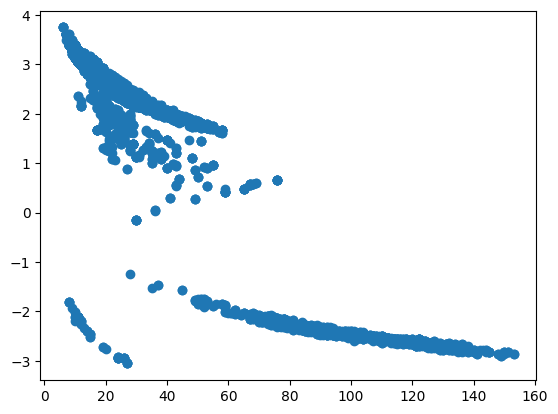

In [43]:
plt.scatter(x = autos['city08'], y = np.log(autos['barrels08']))

In [44]:
X = autos[['barrels08']]

In [45]:
y = autos[['city08']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
y.isna().sum()

city08    0
dtype: int64

In [49]:
pipeline = Pipeline([
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', LinearRegression())])

In [50]:
pipeline.score(X_test, y_test)

0.5537003295678984

<Axes: xlabel='blog', ylabel='city08'>

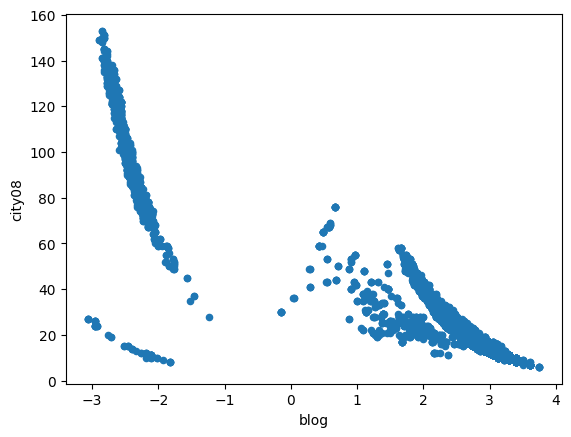

In [52]:
(autos
    .assign(blog=np.log(autos.barrels08))
    .plot.scatter(x='blog', y='city08')
    )

In [54]:
X = np.log(autos[['barrels08']])
y = autos[['city08']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipeline = Pipeline([
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

0.8967284518074071

# Categorical Encoding

## OneHot Encoding

In [55]:
autos.VClass

0            Two Seaters
1            Two Seaters
2        Subcompact Cars
3                   Vans
4           Compact Cars
              ...       
49575       Compact Cars
49576       Compact Cars
49577       Compact Cars
49578       Compact Cars
49579       Compact Cars
Name: VClass, Length: 49580, dtype: object

In [56]:
pd.get_dummies(autos.VClass)

,Compact Cars,Large Cars,Midsize Cars,Midsize Station Wagons,Midsize-Large Station Wagons,Minicompact Cars,Minivan - 2WD,Minivan - 4WD,Small Pickup Trucks,Small Pickup Trucks 2WD,...,Standard Pickup Trucks 4WD,Standard Pickup Trucks/2wd,Standard Sport Utility Vehicle 2WD,Standard Sport Utility Vehicle 4WD,Subcompact Cars,Two Seaters,Vans,Vans Passenger,"Vans, Cargo Type","Vans, Passenger Type"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49576,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49577,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49578,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
autos.VClass.value_counts()

VClass
Compact Cars                          6569
Midsize Cars                          5843
Subcompact Cars                       5795
Large Cars                            2770
Two Seaters                           2503
Standard Pickup Trucks                2354
Small Sport Utility Vehicle 4WD       2168
Sport Utility Vehicle - 4WD           2078
Standard Sport Utility Vehicle 4WD    1908
Small Station Wagons                  1786
Standard Pickup Trucks 4WD            1687
Minicompact Cars                      1657
Sport Utility Vehicle - 2WD           1627
Standard Pickup Trucks 2WD            1487
Special Purpose Vehicles              1455
Small Sport Utility Vehicle 2WD       1176
Vans                                  1141
Special Purpose Vehicle 2WD            748
Midsize-Large Station Wagons           656
Midsize Station Wagons                 614
Standard Sport Utility Vehicle 2WD     582
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                514
Vans

Different types of encoding - One Hot Encoding, Label Encoding, Target Encoding, Wieghted Target Encoding - Bayesian Mean Encoding, Kmean Encoding - ( Uses a math formula to calculate the encoding - this prevents data leakage )

In [58]:
pd.get_dummies(autos.VClass, drop_first=True)

,Large Cars,Midsize Cars,Midsize Station Wagons,Midsize-Large Station Wagons,Minicompact Cars,Minivan - 2WD,Minivan - 4WD,Small Pickup Trucks,Small Pickup Trucks 2WD,Small Pickup Trucks 4WD,...,Standard Pickup Trucks 4WD,Standard Pickup Trucks/2wd,Standard Sport Utility Vehicle 2WD,Standard Sport Utility Vehicle 4WD,Subcompact Cars,Two Seaters,Vans,Vans Passenger,"Vans, Cargo Type","Vans, Passenger Type"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
# Cardinality - number of unique values in a column
# probably don't want to make ~5k model columns
(autos
 .select_dtypes(object) # use 'string[pyarrow]' if using pyarrow types
 .nunique()
)

make           146
model         5511
trany           40
drive            7
VClass          34
eng_dscr       620
evMotor        558
fuelType        15
trans_dscr      52
offset           2
str_date       470
dtype: int64

In [62]:
# Cardinality - number of unique values in a column
# probably don't want to make ~5k model columns
(autos
 .select_dtypes(object)
 .nunique()
 .index
)

Index(['make', 'model', 'trany', 'drive', 'VClass', 'eng_dscr', 'evMotor',
       'fuelType', 'trans_dscr', 'offset', 'str_date'],
      dtype='object')

In [63]:
 # Impute missing values AND convert Pandas 2 strings to Pandas 1 strings
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_imputer', cat_imputer, cat_cols),
        ('one_hot_encoder', one_hot_encoder, cat_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train.assign(**X_train.select_dtypes('string[pyarrow]').astype(str)), y_train)


ValueError: could not convert string to float: 'Toyota'

In [64]:
# Debug with FunctionTransformer
# And figure out that I need a separate pipeline for categorical columns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]

cat_pipe = Pipeline([
    ('cat_imputer', cat_imputer),
    ('one_hot_encoder', one_hot_encoder)
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_pl', cat_pipe, cat_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                           ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x30ee5e0c0>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [69]:
pipeline.score(X_test, y_test)

ValueError: Found unknown categories ['Mahindra', 'Kandi', 'Qvale', 'Mini', 'General Motors', 'STI'] in column 0 during transform

In [70]:
# Debug with FunctionTransformer
# And figure out that I need a separate pipeline for categorical columns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown = 'ignore')

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]

cat_pipe = Pipeline([
    ('cat_imputer', cat_imputer),
    ('one_hot_encoder', one_hot_encoder)
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('cat_pl', cat_pipe, cat_cols),
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                           ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['make', 'model', 'trany',
                                                   'drive', 'VClass',
                                                   'eng_dscr', 'evMotor',
                                                   'fuelType',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x3183096c0>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [71]:
pipeline.score(X_test, y_test)

/Users/insecupa/Documents/Coding/AiCoding/AiGenAiLearnJourney/ailearnenv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 5, 6, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9262371311738191

## Hash Encoding

In [72]:
%pip install category_encoders


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
(autos
 .select_dtypes(object)
 .nunique()
)


make           146
model         5511
trany           40
drive            7
VClass          34
eng_dscr       620
evMotor        558
fuelType        15
trans_dscr      52
offset           2
str_date       470
dtype: int64

In [74]:
(autos
 .select_dtypes(object)
 .nunique()
 .pipe(lambda s: s[s > 40])
 .index
)


Index(['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr', 'str_date'], dtype='object')

In [75]:
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


In [76]:
# low cardinality columns
(autos
 .select_dtypes(object)
 .nunique()
 .index
 .difference(high_cardinality_cols)
)

Index(['VClass', 'drive', 'fuelType', 'offset', 'str_date', 'trany'], dtype='object')

In [77]:
# replace one hot encoder with hashing encoder for high cardinality columns
from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder

X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# add hashing encoder
cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)

def debug_transformer(X, name):
    globals()[name] = X
    return X

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        #('cat_pl', cat_pipe, cat_cols),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        ('hashing_encoder', hashing_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),
                          ('std_scaler', std_scaler),
                           #  ('minmax_scaler', minmax_scaler, ['range']),
                           ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cyl_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['cylinders']),
                                                 ('displ_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['displ']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False),
                                                  ['VClass', 'drive',
                                                   'fuelType', 'trany']),
                                                 ('hashing_encoder',
                                                  HashingEncoder(drop_invariant=True,
                                                                 max_process=4,
                                                                 n_components=10),
                                                  ['make', 'model', 'eng_dscr',
                                                   'evMotor',
                                                   'trans_dscr'])])),
                ('debug',
                 FunctionTransformer(func=<function debug_transformer at 0x318399e40>,
                                     kw_args={'name': 'tmp_X'})),
                ('std_scaler', StandardScaler()), ('lr', LinearRegression())])

In [78]:
pipeline.score(X_test, y_test)

0.92089781113156

## Target Encoding

In [79]:
from sklearn.preprocessing import TargetEncoder

te = TargetEncoder(target_type='continuous', random_state=42)
te.fit_transform(X_train[['make']], y_train)

,make
22960,23.787193
3600,19.973010
25237,20.931016
41446,16.104243
29035,18.626773
...,...
11284,17.592577
44732,23.206869
38158,17.826060
860,20.845890


## Categorical Challenge

Create a model to predict mileage using only the categorical columns (dropping the *model* column)

```
cat_cols = ['trany', 'drive', 'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr']
```

In [81]:
cat_cols = ['trany', 'drive', 'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr']

In [95]:
# Create X and Y 

# from sklearn.model_selection import test_train_split

X = (autos.loc[:, cat_cols] )
X
y = autos.city08

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the pipeline

column_transformer = ColumnTransformer(
    transformers = [
        ('one_hot_encoder', OneHotEncoder(drop='first', max_categories = 10, sparse_output=False, handle_unknown='ignore'), cat_cols)
    ],
    remainder = 'passthrough'
)

#Not using imputer here just will skip

# Fit the pipeline 
pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('linear_reg', LinearRegression())
])

pipeline.fit(X_train, y_train)

# score the pipeline

pipeline.score(X_test, y_test)

/Users/insecupa/Documents/Coding/AiCoding/AiGenAiLearnJourney/ailearnenv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8808026340522563

In [92]:
pipeline.fit(X_train, y_train)

ValueError: too many values to unpack (expected 2)

# Feature Extraction

## PCA

In [101]:
# Create PCA Pipeline
from sklearn.decomposition import PCA

# replace hashing encoder with target encoder for high cardinality columns
# import pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import hashing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, TargetEncoder
from sklearn import set_config
set_config(transform_output='pandas')

# create X and y
X = autos.drop(columns=['city08', 'highway08', 'comb08', 'createdOn', 'offset', 'str_date'])
y = autos.city08

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create pipeline fill cylinders with 0 and displ with median

cylinders_imputer = SimpleImputer(strategy='constant', fill_value=0)
displ_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
one_hot_encoder = OneHotEncoder(drop='first', max_categories=10, sparse_output=False, handle_unknown='ignore')
hashing_encoder = hashing.HashingEncoder(n_components=10, drop_invariant=True)
target_encoder = TargetEncoder(target_type='continuous', random_state=42)

def debug_transformer(X, name):
    globals()[name] = X
    return X

class PyArrowStringConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.assign(**X.select_dtypes('string[pyarrow]').astype(str))

cat_cols =  ['make', 'model', 'trany', 'drive', 
            'VClass', 'eng_dscr', 'evMotor', 'fuelType', 'trans_dscr', ]
low_cardinality_cols = ['VClass', 'drive', 'fuelType', 'trany']
high_cardinality_cols = ['make', 'model', 'eng_dscr', 'evMotor', 'trans_dscr']


# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cyl_imputer', cylinders_imputer, ['cylinders']),
        ('displ_imputer', displ_imputer, ['displ']),
        ('one_hot_encoder', one_hot_encoder, low_cardinality_cols),
        #('hashing_encoder', hashing_encoder, high_cardinality_cols)
        ('target_encoder', target_encoder, high_cardinality_cols)
    ],
    remainder='passthrough'
)

# pipeline
pipeline = Pipeline(steps=[
    ('string_converter', PyArrowStringConverter()),
    ('preprocessor', preprocessor), 
    ('std_scaler', std_scaler),
    ('pca', PCA(n_components=20)),
    ('debug', FunctionTransformer(debug_transformer, kw_args={'name': 'tmp_X'})),    
    #  ('minmax_scaler', minmax_scaler, ['range']),
    ('lr', LinearRegression())])

# fit the pipeline
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)


0.9173747940724897

In [102]:
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
import seaborn as sns

In [104]:
sns.heatmap(X_train.corr())

ValueError: could not convert string to float: 'Toyota'

## Feature Extraction